In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('pastel')

In [2]:
data = pd.read_csv('data_graphs.csv', index_col = 0)

In [3]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Кухня
2,27,13.0,6,Вторичка,2.60,совмещенный,1,1595000,1,Тракторозаводский,6.0
3,32,18.0,3,Вторичка,2.55,совмещенный,1,1600000,1,Советский,6.0
5,32,18.0,2,Вторичка,2.55,совмещенный,1,1660000,1,Краснооктябрьский,6.0
6,29,18.0,2,Вторичка,2.60,совмещенный,1,1440000,1,Дзержинский,6.0
7,62,19.0,12,Новостройка,2.60,совмещенный,1,2529400,1,Краснооктябрьский,12.0


In [4]:
data["Балкон/лоджия"].unique()

array([1, 0, 2, 3])

In [5]:
data["Санузел"].unique()

array(['совмещенный', 'раздельный'], dtype=object)

In [6]:
data["Тип жилья"].unique()

array(['Вторичка', 'Новостройка', 'Вторичка Апартаменты'], dtype=object)

In [7]:
data["Район"].unique()

array(['Тракторозаводский', 'Советский', 'Краснооктябрьский',
       'Дзержинский', 'Красноармейский', 'Ворошиловский', 'Кировский',
       'Центральный'], dtype=object)

In [8]:
data["Комнат"].unique()

array([1, 3, 2])

In [9]:
# не важно 2 или 3 балкона, важно, что он есть
data.loc[data['Балкон/лоджия'] == 2, 'Балкон/лоджия'] = 1
data.loc[data['Балкон/лоджия'] == 3, 'Балкон/лоджия'] = 1

In [10]:
data["Балкон/лоджия"].unique()

array([1, 0])

In [11]:
#'Вторичка Апартаменты' - выкидываем
data = data.loc[data['Тип жилья'] != 'Вторичка Апартаменты']

In [12]:
data["Тип жилья"].unique()

array(['Вторичка', 'Новостройка'], dtype=object)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 2 to 1537
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Общая            3576 non-null   int64  
 1   Жилая            3576 non-null   float64
 2   Этаж             3576 non-null   int64  
 3   Тип жилья        3576 non-null   object 
 4   Высота потолков  3576 non-null   float64
 5   Санузел          3576 non-null   object 
 6   Балкон/лоджия    3576 non-null   int64  
 7   Цена             3576 non-null   int64  
 8   Комнат           3576 non-null   int64  
 9   Район            3576 non-null   object 
 10  Кухня            3576 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 335.2+ KB


In [14]:
data['id'] = range(1, 3577) # добавим уникальные id

In [15]:
data

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Кухня,id
2,27,13.0,6,Вторичка,2.60,совмещенный,1,1595000,1,Тракторозаводский,6.0,1
3,32,18.0,3,Вторичка,2.55,совмещенный,1,1600000,1,Советский,6.0,2
5,32,18.0,2,Вторичка,2.55,совмещенный,1,1660000,1,Краснооктябрьский,6.0,3
6,29,18.0,2,Вторичка,2.60,совмещенный,1,1440000,1,Дзержинский,6.0,4
7,62,19.0,12,Новостройка,2.60,совмещенный,1,2529400,1,Краснооктябрьский,12.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1526,49,31.0,5,Вторичка,2.50,совмещенный,1,2500000,2,Краснооктябрьский,6.0,3572
1527,44,27.0,2,Вторичка,2.60,раздельный,0,2500000,2,Дзержинский,6.0,3573
1528,48,27.0,4,Вторичка,2.60,раздельный,1,2500000,2,Дзержинский,9.0,3574
1532,49,33.0,1,Вторичка,2.55,совмещенный,1,2400000,2,Советский,8.0,3575


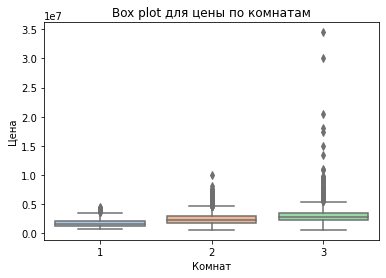

In [16]:
plt.title("Box plot для цены по комнатам")
_ = sns.boxplot(data = data, x = 'Комнат', y = 'Цена')

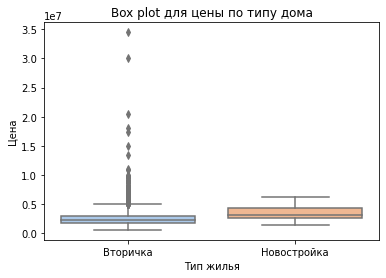

In [17]:
plt.title("Box plot для цены по типу дома")
_ = sns.boxplot(data = data, x = 'Тип жилья', y = 'Цена')

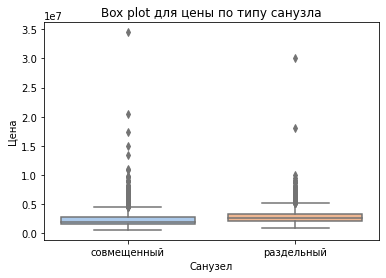

In [18]:
plt.title("Box plot для цены по типу санузла")
_ = sns.boxplot(data = data, x = 'Санузел', y = 'Цена')

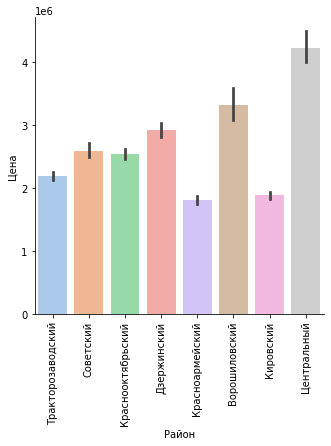

In [19]:
sns.catplot(x='Район', y='Цена', data=data, kind='bar')
_ = plt.xticks(rotation=90)

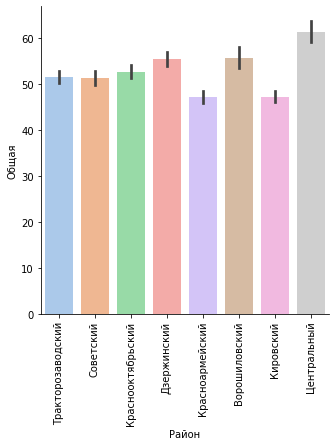

In [20]:
sns.catplot(x='Район', y='Общая', data=data, kind='bar')
_ = plt.xticks(rotation=90)

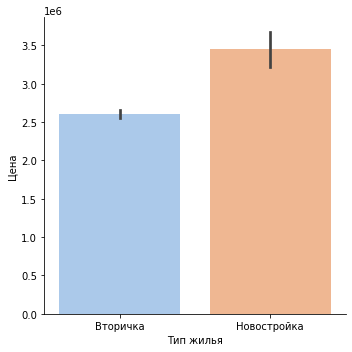

In [21]:
_ = sns.catplot(x='Тип жилья', y='Цена', data=data, kind='bar')

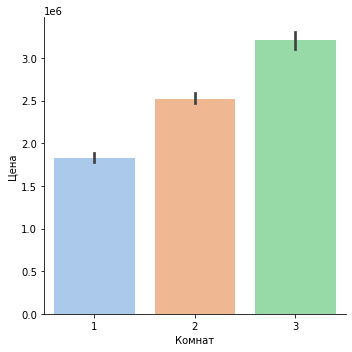

In [22]:
_ = sns.catplot(x='Комнат', y='Цена', data=data, kind='bar')

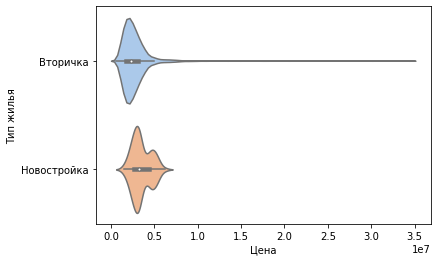

In [23]:
_ = sns.violinplot(x='Цена', y = 'Тип жилья', data = data)

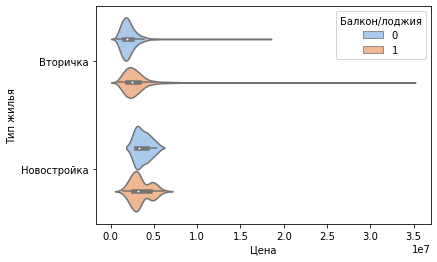

In [24]:
_ = sns.violinplot(x='Цена', y = 'Тип жилья', data = data, hue='Балкон/лоджия')

In [25]:
data.loc[data['Комнат'] == 1, 'Комнат'] = 'однакомнатные'
data.loc[data['Комнат'] == 2, 'Комнат'] = 'двухкомнатные'
data.loc[data['Комнат'] == 3, 'Комнат'] = 'трехкомнатные'

In [26]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Кухня,id
2,27,13.0,6,Вторичка,2.60,совмещенный,1,1595000,однакомнатные,Тракторозаводский,6.0,1
3,32,18.0,3,Вторичка,2.55,совмещенный,1,1600000,однакомнатные,Советский,6.0,2
5,32,18.0,2,Вторичка,2.55,совмещенный,1,1660000,однакомнатные,Краснооктябрьский,6.0,3
6,29,18.0,2,Вторичка,2.60,совмещенный,1,1440000,однакомнатные,Дзержинский,6.0,4
7,62,19.0,12,Новостройка,2.60,совмещенный,1,2529400,однакомнатные,Краснооктябрьский,12.0,5


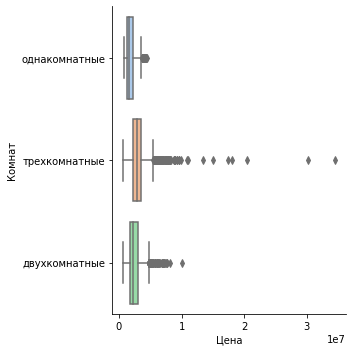

In [27]:
_ = sns.catplot(x = 'Цена', y = 'Комнат', data = data, kind='box')

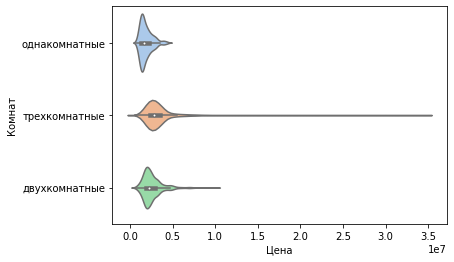

In [28]:
_ = sns.violinplot(x='Цена', y = 'Комнат', data = data)

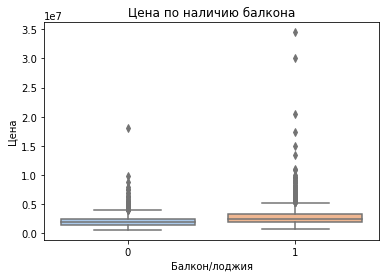

In [29]:
plt.title("Цена по наличию балкона")
_ = sns.boxplot(data = data, x = 'Балкон/лоджия', y = 'Цена')

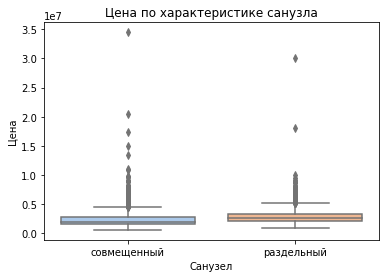

In [30]:
plt.title("Цена по характеристике санузла")
_ = sns.boxplot(data = data, x = 'Санузел', y = 'Цена')

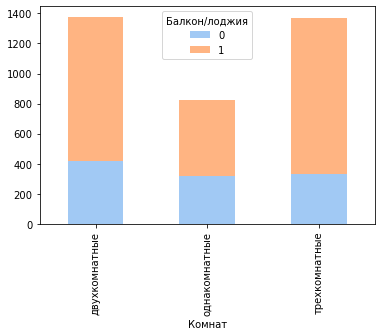

In [31]:
_ = data.pivot_table('id', 'Комнат', 'Балкон/лоджия', 'count').plot(kind='bar', stacked=True)

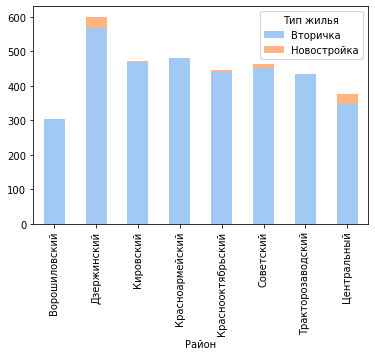

In [32]:
#распределение по районам 
_ = data.pivot_table('id', 'Район', 'Тип жилья', 'count').plot(kind='bar', stacked=True)

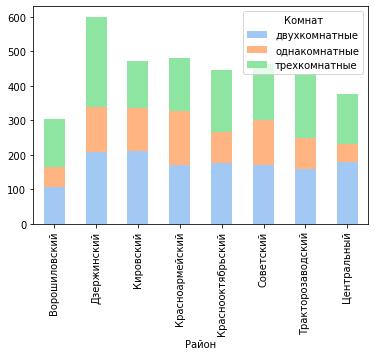

In [33]:
_ = data.pivot_table('id', 'Район', 'Комнат', 'count').plot(kind='bar', stacked=True)

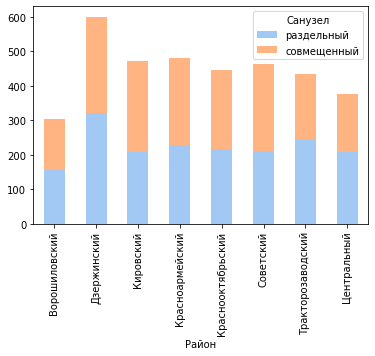

In [34]:
_ = data.pivot_table('id', 'Район', 'Санузел', 'count').plot(kind='bar', stacked=True)

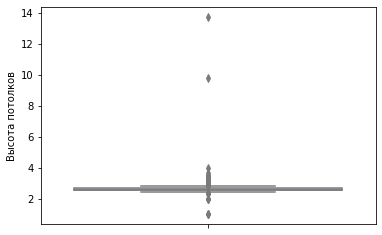

In [35]:
_ = sns.boxplot( y=data["Высота потолков"] ) ## Важно -- видим выбросы

In [36]:
data = data.drop(['Тип жилья'],axis=1)

In [37]:
data = data.drop(['Санузел'],axis=1)

In [38]:
data = data.drop(['Балкон/лоджия'],axis=1)

In [39]:
data = data.drop(['Комнат'],axis=1)

In [40]:
data = data.drop(['Район'],axis=1)

In [41]:
data = data.drop(['id'],axis=1)

In [42]:
data.tail()

,Общая,Жилая,Этаж,Высота потолков,Цена,Кухня
1526,49,31.0,5,2.50,2500000,6.0
1527,44,27.0,2,2.60,2500000,6.0
1528,48,27.0,4,2.60,2500000,9.0
1532,49,33.0,1,2.55,2400000,8.0
1537,42,27.0,2,2.60,2200000,6.0


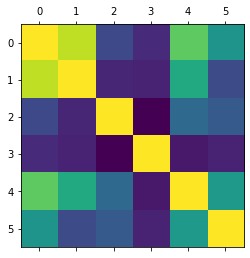

In [43]:
plt.matshow(data.corr())
plt.show()

In [44]:
rs = np.random.RandomState(0)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Общая,Жилая,Этаж,Высота потолков,Цена,Кухня
Общая,1.00,0.90,0.21,0.11,0.75,0.51
Жилая,0.90,1.00,0.09,0.08,0.60,0.22
Этаж,0.21,0.09,1.00,-0.02,0.33,0.27
Высота потолков,0.11,0.08,-0.02,1.00,0.05,0.08
Цена,0.75,0.60,0.33,0.05,1.00,0.53
Кухня,0.51,0.22,0.27,0.08,0.53,1.00


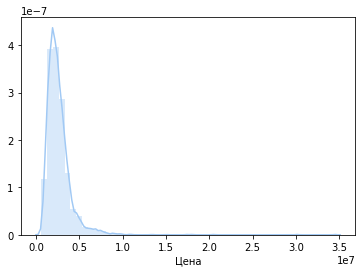

In [45]:
_ = sns.distplot(data['Цена'])

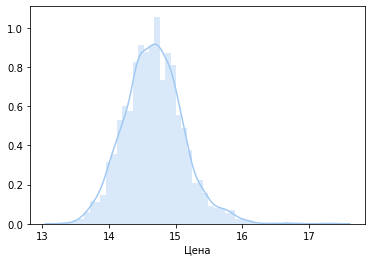

In [46]:
_ = sns.distplot(np.log(data['Цена'])) # Логарифм цены